In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [5]:
df_train.drop(['PassengerId'], axis='columns', inplace=True)

In [6]:
df_train[['Deck', 'Num', 'Side']] = df_train['Cabin'].str.split("/", expand=True).astype(str)
df_test[['Deck', 'Num', 'Side']] = df_test['Cabin'].str.split("/", expand=True).astype(str)

In [7]:
df_train.drop(['Cabin'], axis='columns', inplace=True)
df_test.drop(['Cabin'], axis='columns', inplace=True)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Name          8493 non-null   object 
 11  Transported   8693 non-null   bool   
 12  Deck          8693 non-null   object 
 13  Num           8693 non-null   object 
 14  Side          8693 non-null   object 
dtypes: bool(1), float64(6), object(8)
memory usage: 959.4+ KB


In [9]:
df_cat = [x for x in df_train.columns if np.dtype(df_train[x])==object]
df_cat

['HomePlanet',
 'CryoSleep',
 'Destination',
 'VIP',
 'Name',
 'Deck',
 'Num',
 'Side']

In [27]:
df_train[df_num].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [10]:
df_num = [x for x in df_train.columns if np.dtype(df_train[x])=='float64']
df_num

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

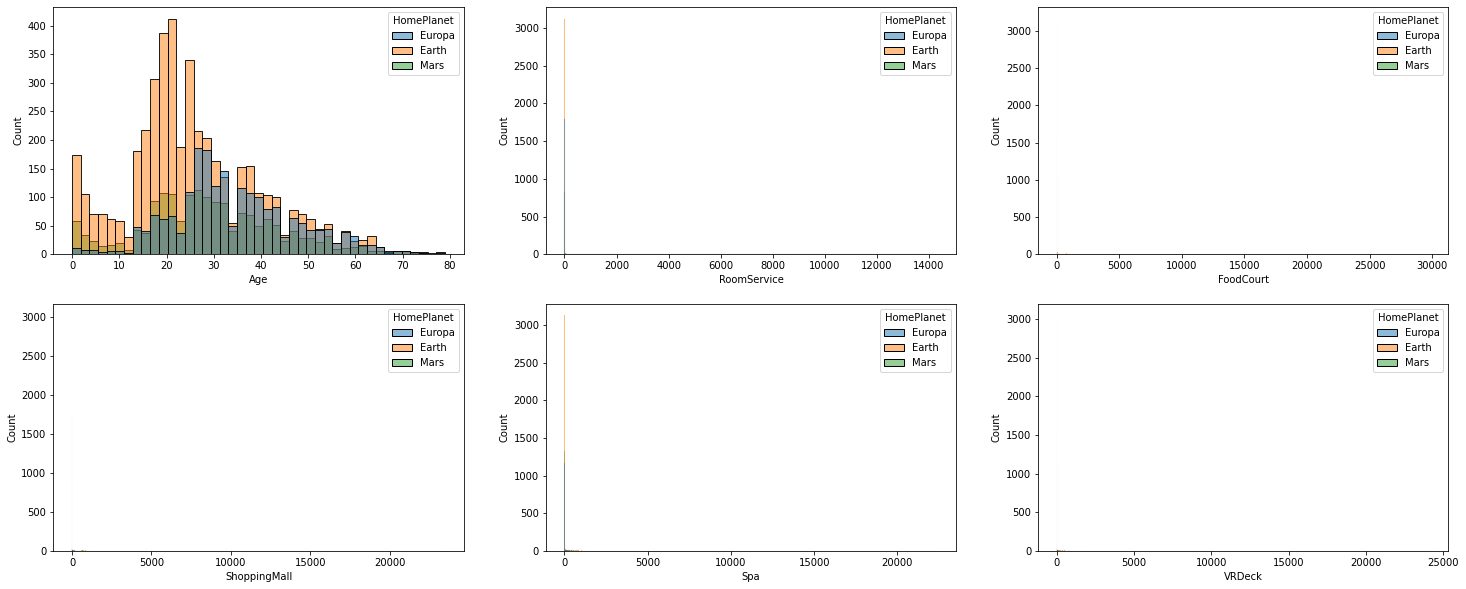

In [31]:
items = [x for x in df_train[df_num]]
fig, axes = plt.subplots(2, 3, figsize=(25,10))
axes = axes.flatten()
for item, ax in zip(items, axes):
    ax = sns.histplot(data=df_train, x=item, hue='HomePlanet', ax=ax)

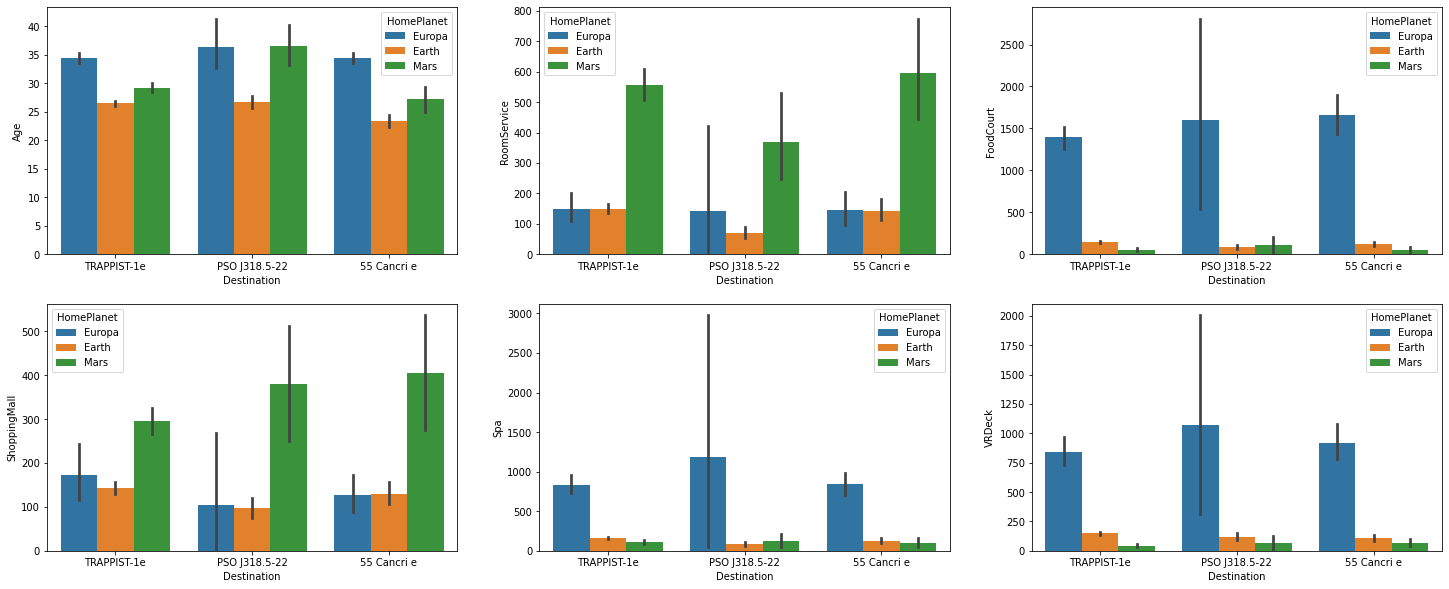

In [33]:
fig, axes = plt.subplots(2, 3, figsize=(25,10))
axes = axes.flatten()
for item, ax in zip(items, axes):
    ax = sns.barplot(data=df_train, x='Destination', y=item, hue='HomePlanet', ax=ax)

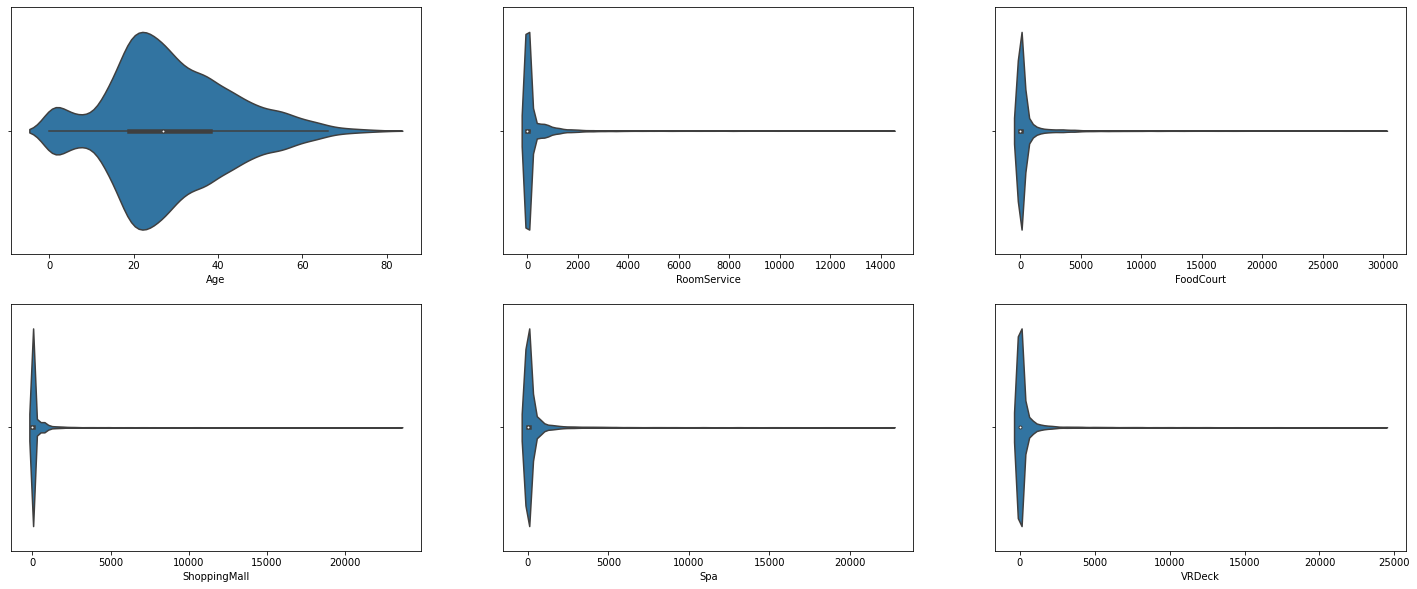

In [30]:
fig, axes = plt.subplots(2, 3, figsize=(25,10))
axes = axes.flatten()
for item, ax in zip(items, axes):
    ax = sns.violinplot(data=df_train, x=item, hue='HomePlanet', ax=ax)

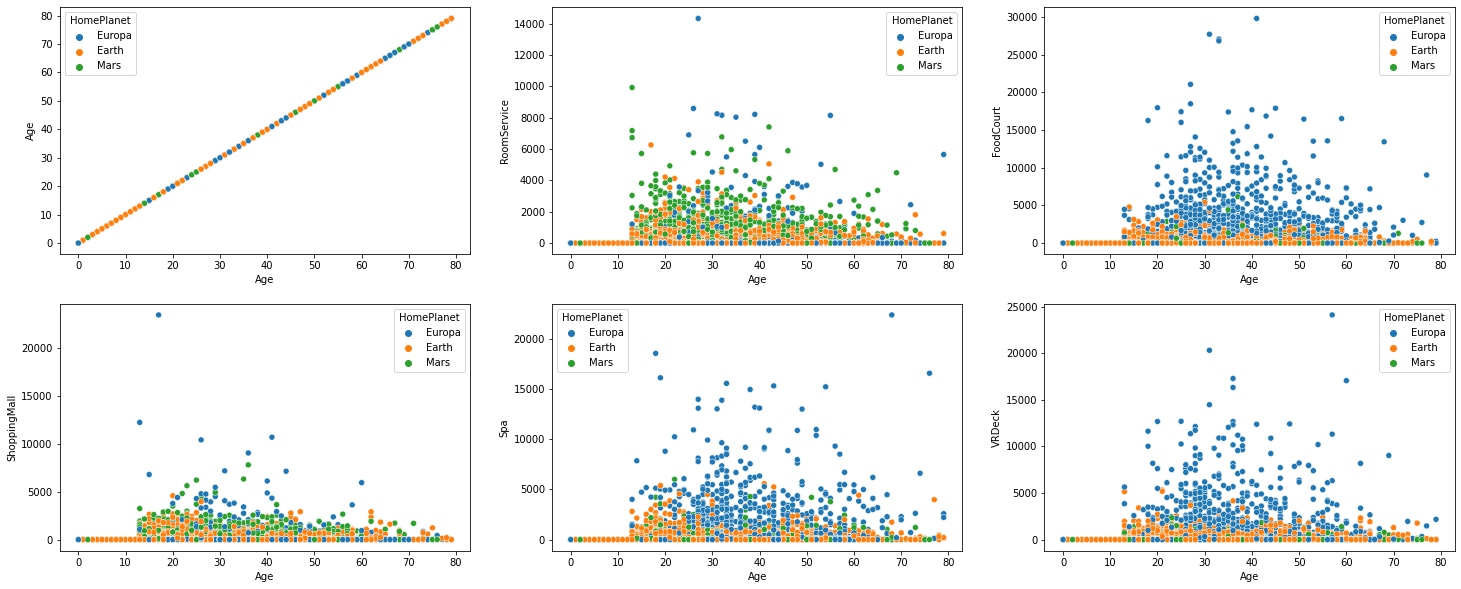

In [28]:
items = [x for x in df_train[df_num]]
fig, axes = plt.subplots(2, 3, figsize=(25,10))
axes = axes.flatten()
for item, ax in zip(items, axes):
    ax = sns.scatterplot(data=df_train, x='Age', y=item, hue='HomePlanet', ax=ax)

<AxesSubplot:>

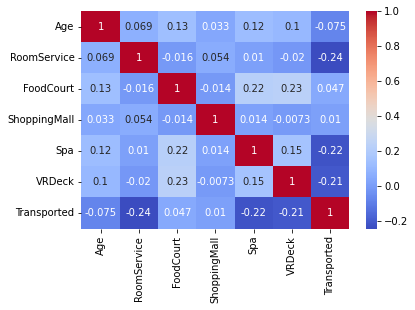

In [12]:
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm')

In [13]:
df_train.dropna(axis=1, thresh=3, inplace=True)

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Name          8493 non-null   object 
 11  Transported   8693 non-null   bool   
 12  Deck          8693 non-null   object 
 13  Num           8693 non-null   object 
 14  Side          8693 non-null   object 
dtypes: bool(1), float64(6), object(8)
memory usage: 959.4+ KB


In [15]:
df_train.isna().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Deck              0
Num               0
Side              0
dtype: int64

In [16]:
rfc = RandomForestClassifier()
svm = svm.SVC()

In [17]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
std = StandardScaler()
mct = make_column_transformer((SimpleImputer(missing_values=np.nan, strategy='most_frequent'), ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Name', 'Deck', 'Num','Side']),
                               (SimpleImputer(missing_values=np.nan, strategy='mean'), df_num),
                               (ohe, ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Name', 'Deck', 'Num','Side']),
                               (std, df_num))

In [18]:
X, Y = df_train.drop(['Transported'], axis='columns'), df_train['Transported']

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [20]:
models = [svm, rfc]
scores = {}
for model in models:
    pipe = make_pipeline(mct, model)
    pipe.fit(X_train, Y_train)
    pipe.predict(X_test)
    score = cross_val_score(pipe, x_train, y_train, cv=5, scoring='accuracy').mean()                      
    scores[model] = score

ValueError: could not convert string to float: 'Mars'